In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

df = pd.read_csv(
    "../data/raw/list_11-09-2025.csv",
    sep=";",
    encoding="utf-8-sig",
    engine="python"
)

for col in df.select_dtypes(include=["object", "string"]).columns:
    df[col] = df[col].astype("string").str.strip()
df = df.replace(r'^\s*$', np.nan, regex=True)

df["dateAccepted"] = pd.to_datetime(df["dateAccepted"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["dateAccepted"])
df["year"] = df["dateAccepted"].dt.year.astype("Int64")

today = pd.Timestamp.today()
df["age_years"] = ((today - df["dateAccepted"]).dt.days / 365).astype(float)

df.head()

,identifier,sportName,type,publisherName,publisherIdentifier,title,dateAccepted,number,status,url,year,age_years
0,2025-33/4.1/25,Бочча,"З грифом ""Затверджено""",Міністерство молоді та спорту України,38649881,Правила спортивних змагань з бочча серед осіб ...,2025-09-11,33/4.1/25,Чинний,https://mms.gov.ua/storage/app/sites/16/Sport/...,2025,0.443836
1,2025-32/3.5/25,Регбі,"З грифом ""Затверджено""",Міністерство молоді та спорту України,38649881,Правила спортивних змагань з регбі,2025-08-21,32/3.5/25,Чинний,https://mms.gov.ua/storage/app/sites/16/Sport/...,2025,0.501370
2,2025-31/4.1/25,Легка атлетика,"З грифом ""Затверджено""",Міністерство молоді та спорту України,38649881,Правила спортивних змагань з пара легкої атлет...,2025-08-13,31/4.1/25,Чинний,https://mms.gov.ua/storage/app/sites/16/Sport/...,2025,0.523288
3,2025-30/3.2/25,Кікбоксинг WАКО,"З грифом ""Затверджено""",Міністерство молоді та спорту України,38649881,Правила спортивних змагань з кікбоксингу WAKO,2025-08-08,30/3.2/25,Чинний,https://mms.gov.ua/storage/app/sites/16/Sport/...,2025,0.536986
4,2025-29/3.2/25,Комбат самозахист ІСО,"З грифом ""Затверджено""",Міністерство молоді та спорту України,38649881,Правила спортивних змагань з комбат самозахист...,2025-08-08,29/3.2/25,Чинний,https://mms.gov.ua/storage/app/sites/16/Sport/...,2025,0.536986


Top-15 видів спорту за кількістю документів (bar)

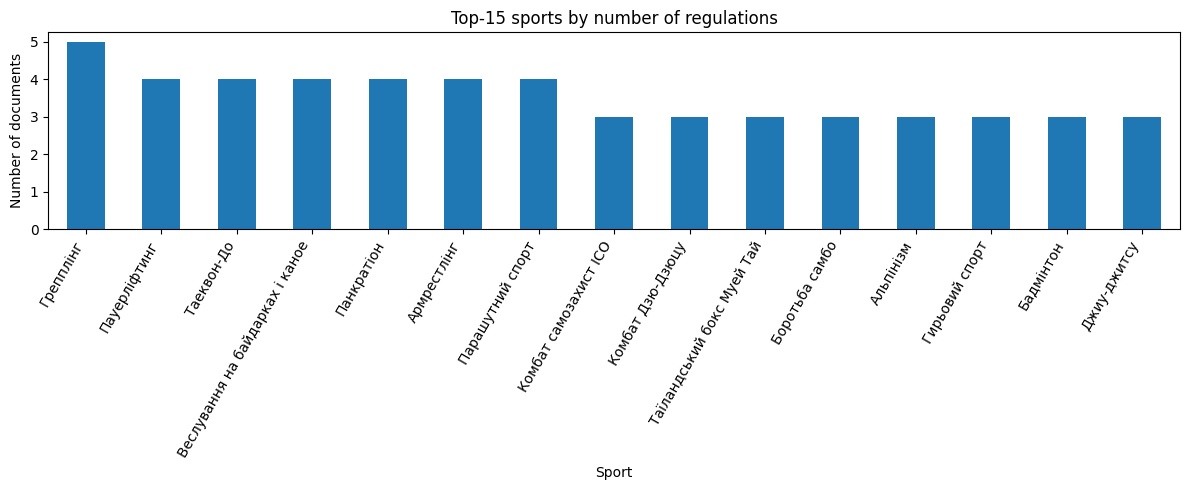

In [4]:
sport_counts = df["sportName"].value_counts()

plt.figure(figsize=(12,5))
sport_counts.head(15).plot(kind="bar")
plt.title("Top-15 sports by number of regulations")
plt.xlabel("Sport")
plt.ylabel("Number of documents")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

Розподіл кількості документів на спорт (hist)

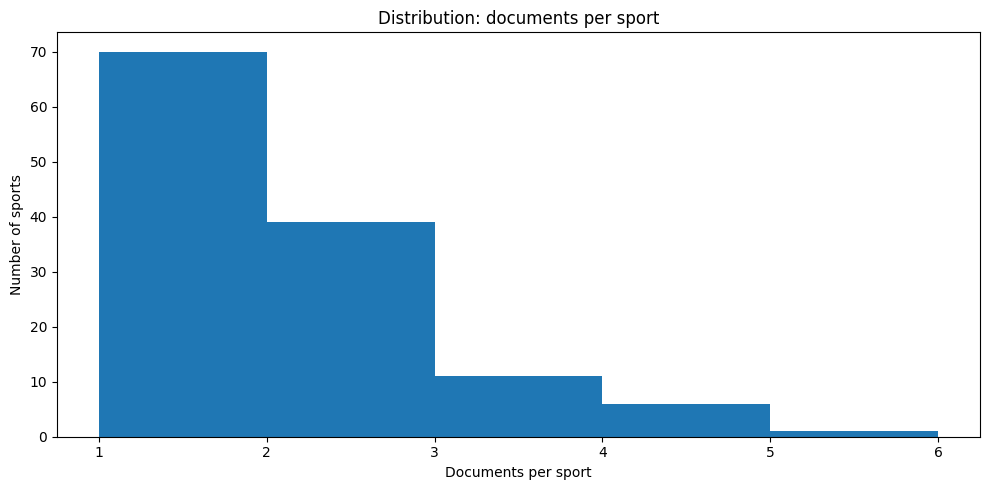

In [5]:
plt.figure(figsize=(10,5))
plt.hist(sport_counts.values, bins=range(1, int(sport_counts.max()) + 2))
plt.title("Distribution: documents per sport")
plt.xlabel("Documents per sport")
plt.ylabel("Number of sports")
plt.tight_layout()
plt.show()

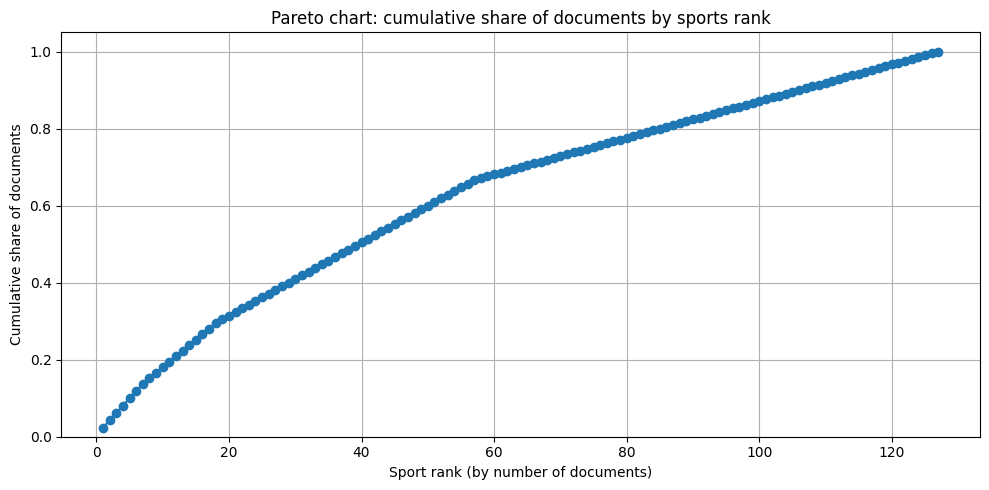

In [6]:
sorted_counts = sport_counts.sort_values(ascending=False)
cum_share = sorted_counts.cumsum() / sorted_counts.sum()

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cum_share)+1), cum_share.values, marker="o")
plt.title("Pareto chart: cumulative share of documents by sports rank")
plt.xlabel("Sport rank (by number of documents)")
plt.ylabel("Cumulative share of documents")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

Лінійний графік кількості документів за роками

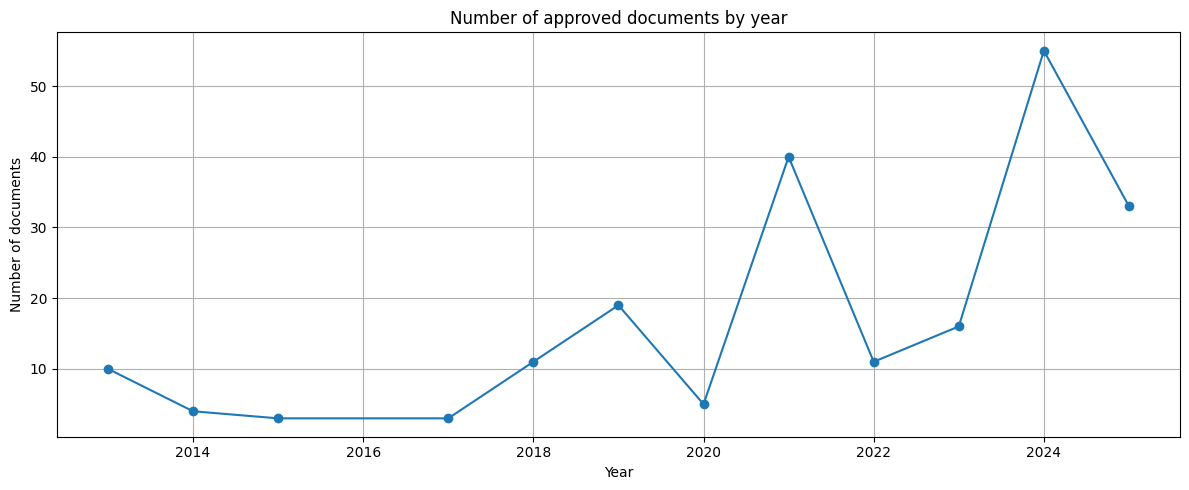

In [7]:
year_counts = df["year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(year_counts.index.astype(int), year_counts.values, marker="o")
plt.title("Number of approved documents by year")
plt.xlabel("Year")
plt.ylabel("Number of documents")
plt.grid(True)
plt.tight_layout()
plt.show()

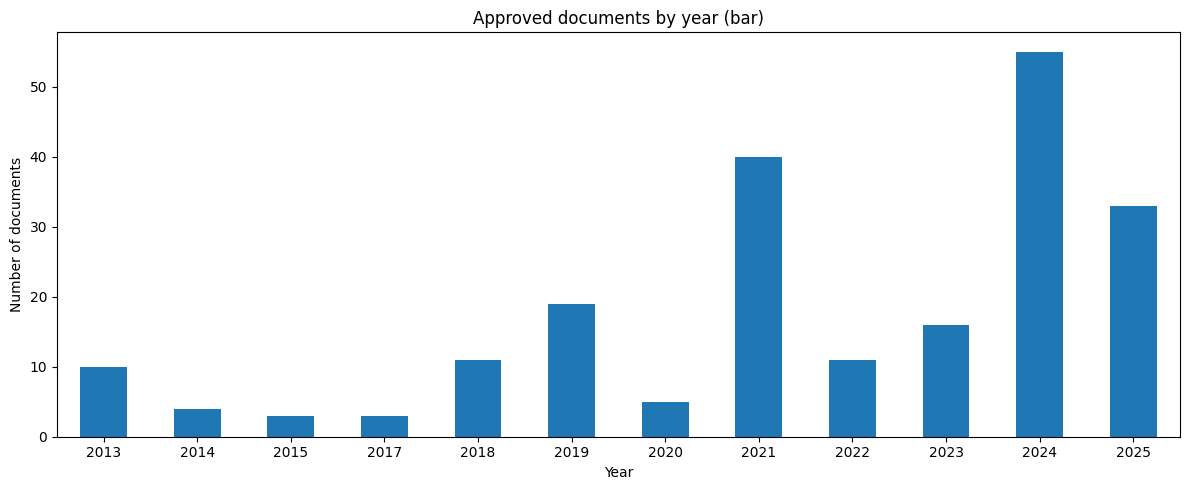

In [8]:
plt.figure(figsize=(12,5))
year_counts.plot(kind="bar")
plt.title("Approved documents by year (bar)")
plt.xlabel("Year")
plt.ylabel("Number of documents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

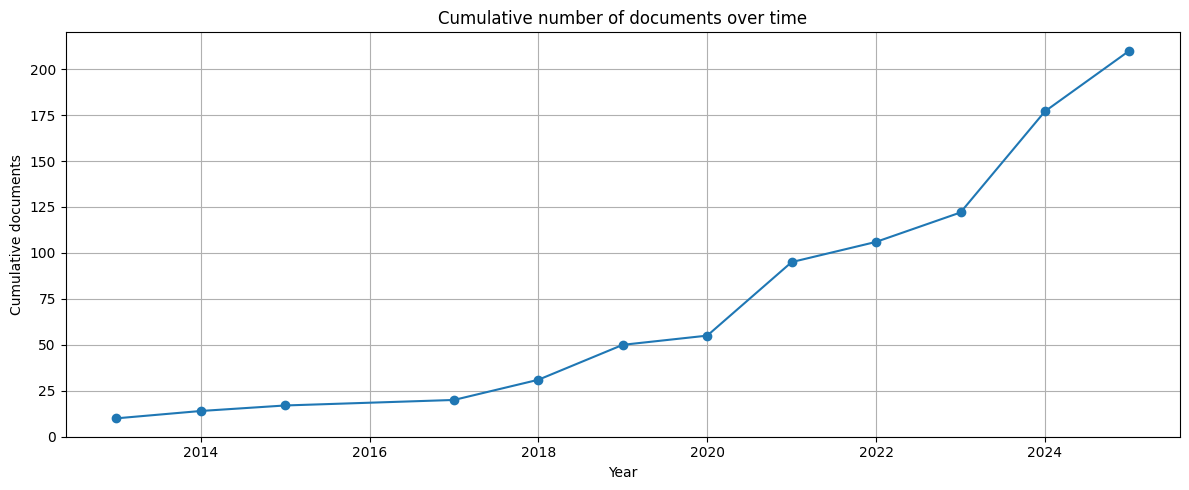

In [9]:
cum_docs = year_counts.cumsum()

plt.figure(figsize=(12,5))
plt.plot(cum_docs.index.astype(int), cum_docs.values, marker="o")
plt.title("Cumulative number of documents over time")
plt.xlabel("Year")
plt.ylabel("Cumulative documents")
plt.grid(True)
plt.tight_layout()
plt.show()

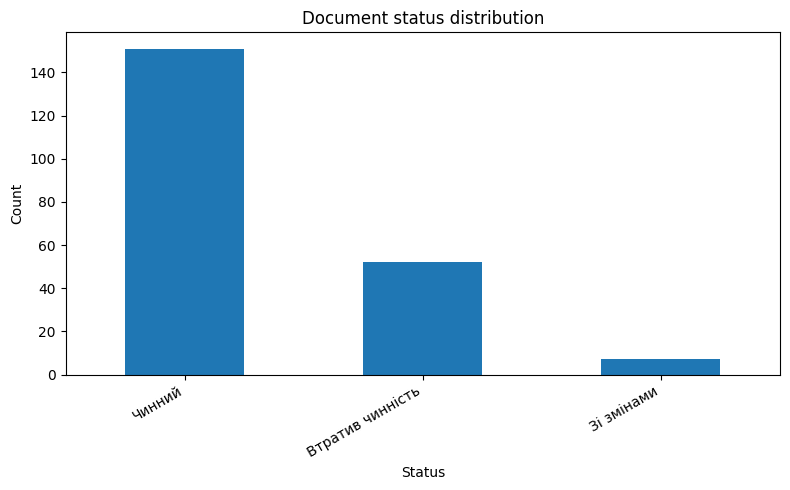

In [10]:
status_counts = df["status"].value_counts()

plt.figure(figsize=(8,5))
status_counts.plot(kind="bar")
plt.title("Document status distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

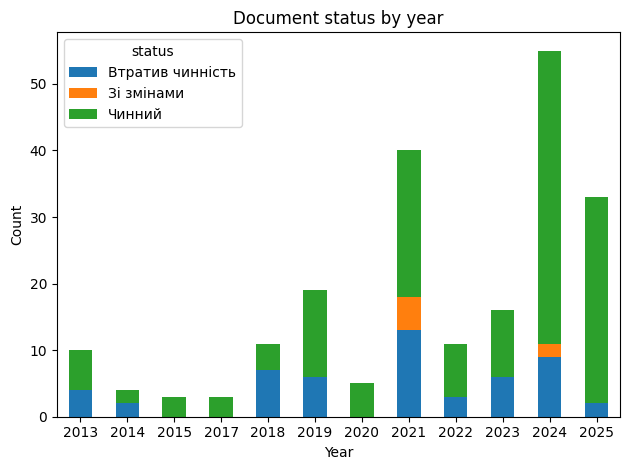

In [11]:
status_by_year = pd.crosstab(df["year"], df["status"]).sort_index()

plt.figure(figsize=(12,6))
status_by_year.plot(kind="bar", stacked=True)
plt.title("Document status by year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

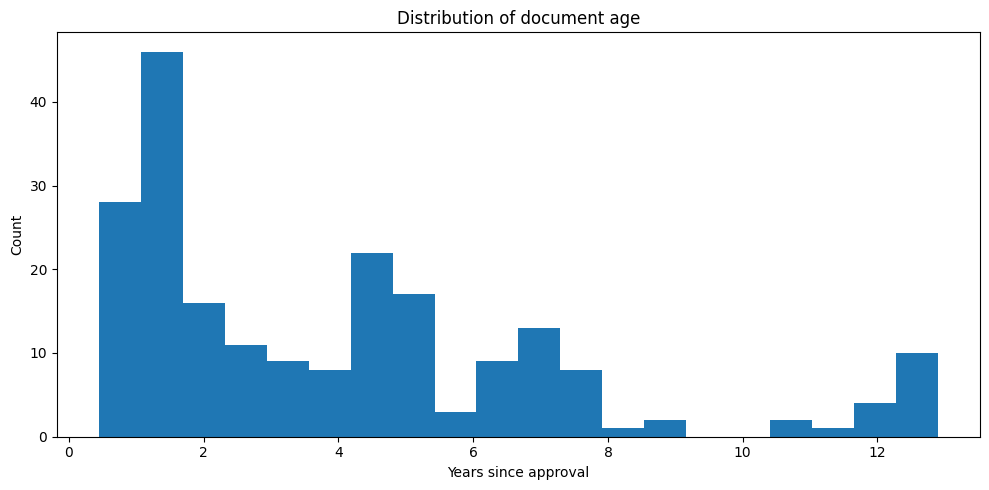

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df["age_years"].dropna(), bins=20)
plt.title("Distribution of document age")
plt.xlabel("Years since approval")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

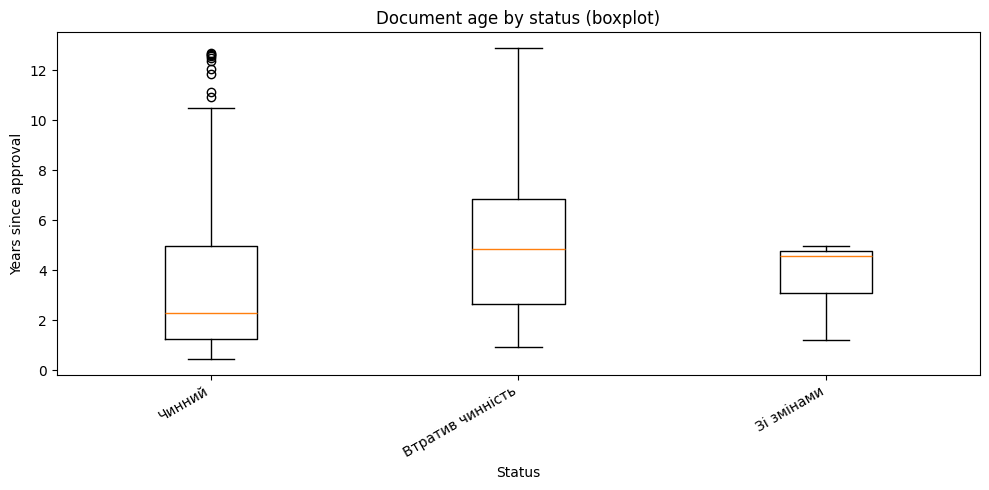

In [14]:
statuses = df["status"].dropna().unique().tolist()
data = [df.loc[df["status"] == s, "age_years"].dropna().values for s in statuses]

plt.figure(figsize=(10,5))
plt.boxplot(data, tick_labels=statuses, showfliers=True)
plt.title("Document age by status (boxplot)")
plt.xlabel("Status")
plt.ylabel("Years since approval")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

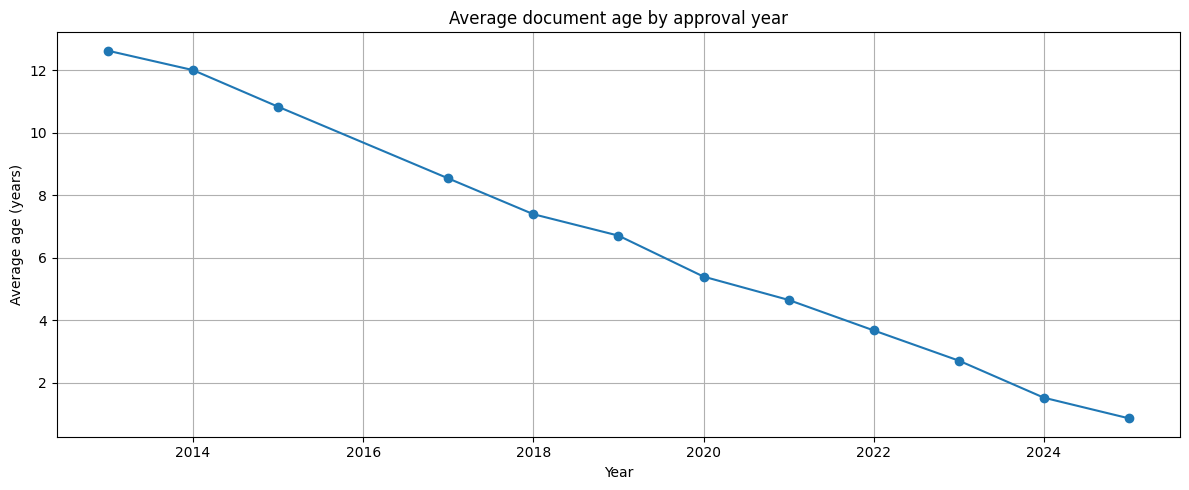

In [15]:
mean_age_by_year = df.groupby("year")["age_years"].mean().dropna().sort_index()

plt.figure(figsize=(12,5))
plt.plot(mean_age_by_year.index.astype(int), mean_age_by_year.values, marker="o")
plt.title("Average document age by approval year")
plt.xlabel("Year")
plt.ylabel("Average age (years)")
plt.grid(True)
plt.tight_layout()
plt.show()